# Deutsch Algorithm

## Background
Usage estimate: 4 seconds on ibm_nairobi(NOTE; This is an estimate only. Your runtime may
vary)

In order to run Deutsch-Jozsa algorithm (a generalization of Deutsch’s algorithm)
requires an oracle that implements the function either constant or balanced and
Deutsch-Josza Circuit.
Here, we demonstrate how to construct Deutsch-Josza oracles and use the gates
from the Qiskit circuit library to easily set up a Deutsch-Josza Circuit. The runtime
Sampler primitive allows seamless execution of Deutsch-Josza circuit.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [5]:
#Built-in modules
import math

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [6]:
# To run on hardware, selectthe backedn with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

## Step 1: Map classical inputs to a quantum problem

Deutsch algorithm requires an oracle that implements the function either constant or balanced. Here, we demonstrate how to construct Deutsch oracles and use the gates from the Qiskit circuit library to easily set up a Deutsch Circuit. 

The runtime Sampler primitive allows seamless execution of Deutsch circuit.

In [115]:
def deutsch_circuit(value):
    # Create a Quantum Circuit
    qubits=QuantumRegister(2,name="q")
    cbits=ClassicalRegister(1,name="c")
    circuit=QuantumCircuit(qubits,cbits)

    q0,q1=qubits
    circuit.h(q0)
    circuit.x(q1)
    circuit.h(q1)

    circuit.barrier()
    if(value==1):
        circuit.id(q0)
        circuit.id(q1)
    elif(value==2):
        circuit.id(q0)
        circuit.x(q1)
    elif(value==3):
        circuit.cx(q0,q1)
    elif(value==4):
        circuit.cx(q0,q1)
        circuit.x(q1)
    
    circuit.barrier()
    circuit.h(q0)

    circuit.measure(q0,0)


    return circuit

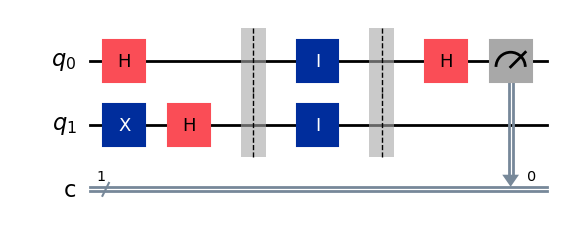

In [142]:
qc_1=deutsch_circuit(1)
qc_1.draw("mpl")

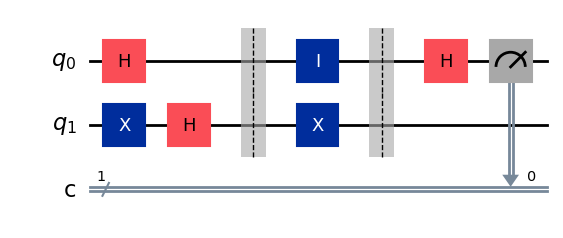

In [117]:
qc_2=deutsch_circuit(2)
qc_2.draw("mpl")

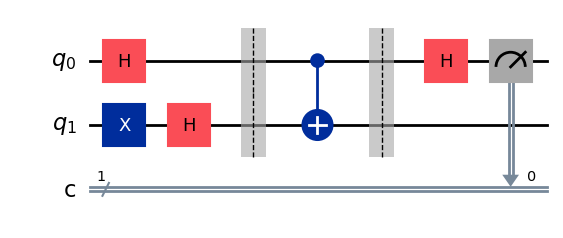

In [118]:
qc_3=deutsch_circuit(3)
qc_3.draw("mpl")

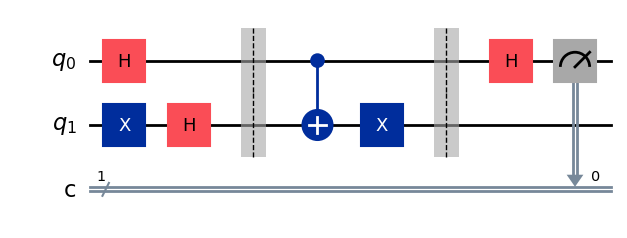

In [119]:
qc_4=deutsch_circuit(4)
qc_4.draw("mpl")

## Step 2: Optimize problem for quantum execution

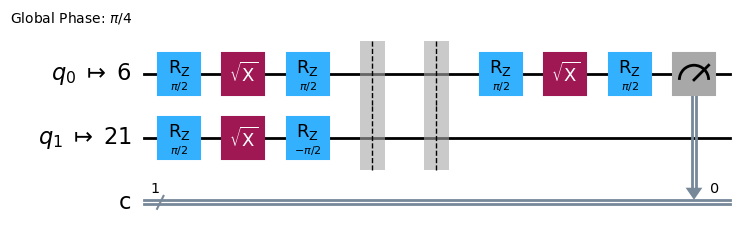

In [120]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_1=pm.run(qc_1)
circuit_isa_1.draw(output="mpl",idle_wires=False,style="iqp")

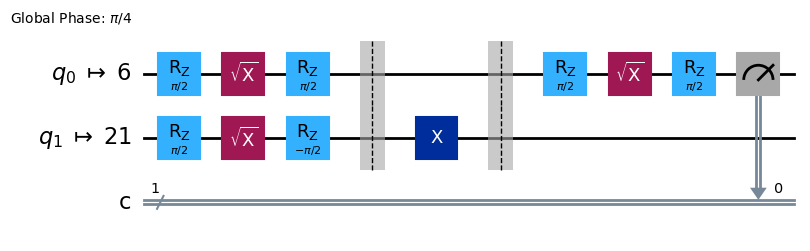

In [121]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_2=pm.run(qc_2)
circuit_isa_2.draw(output="mpl",idle_wires=False,style="iqp")

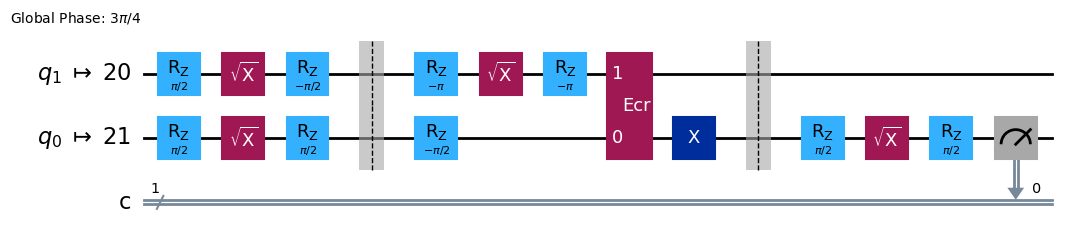

In [122]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_3=pm.run(qc_3)
circuit_isa_3.draw(output="mpl",idle_wires=False,style="iqp")

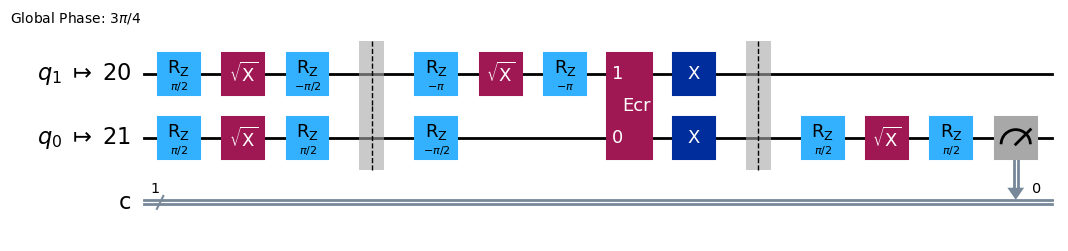

In [123]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_4=pm.run(qc_4)
circuit_isa_4.draw(output="mpl",idle_wires=False,style="iqp")

## Step 3: Execute using Qiskit Primitives

We are now required to run the circuit and sample the measurements on th first qubit thus for execution we will use the Sampler runtime primitive.

In [124]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_1 = sampler.run([circuit_isa_1]).result()
dist_1 = result_1[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_22624\664816004.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [125]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_2 = sampler.run([circuit_isa_2]).result()
dist_2 = result_2[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_22624\2408799414.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [126]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_3 = sampler.run([circuit_isa_3]).result()
dist_3 = result_3[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_22624\1917899777.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [127]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_4 = sampler.run([circuit_isa_4]).result()
dist_4 = result_4[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_22624\4211817840.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


## Step 4: Post-Process, reutrn result in Classical format

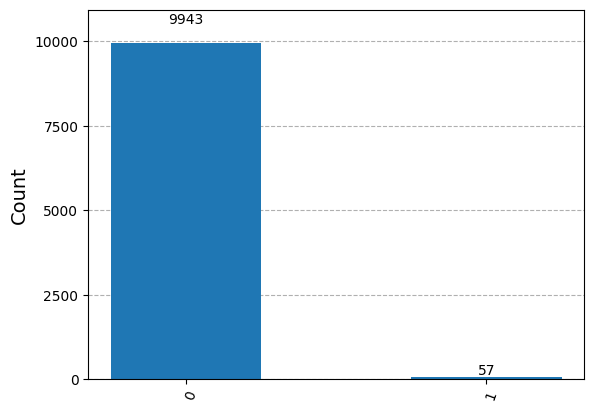

In [129]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_1)

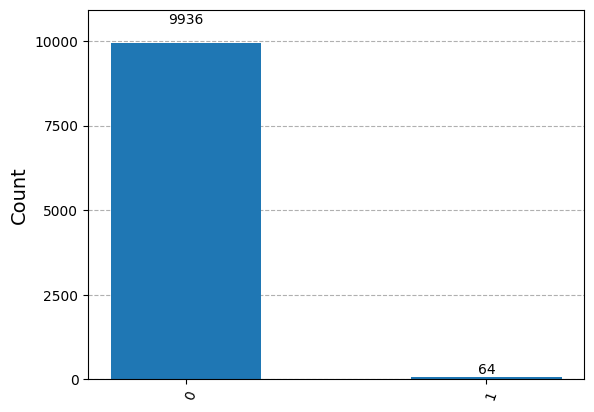

In [130]:
plot_histogram(dist_2)

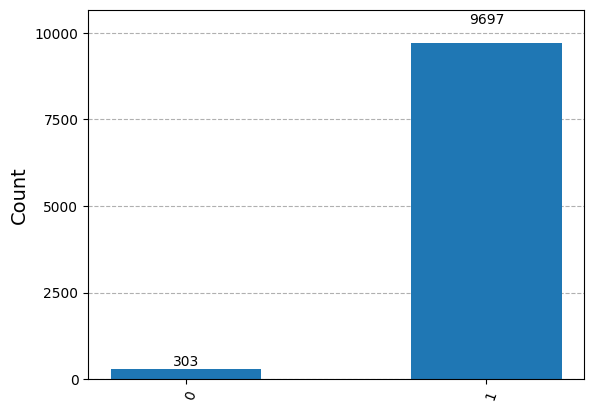

In [131]:
plot_histogram(dist_3)

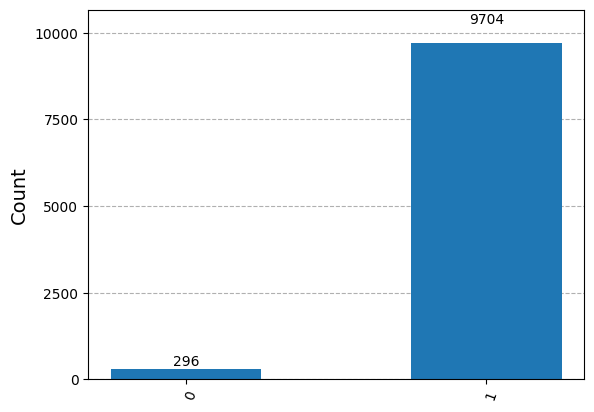

In [132]:
plot_histogram(dist_4)

# Deutsch-Josza Algorithm

## Background
Usage estimate: 4 seconds on ibm\_brisbane(NOTE; This is an estimate only. Your runtime may vary)

In order to run Deutsch-Jozsa algorithm requires an oracle that implements the function either constant or balanced and Deutsch-Jozsa Circuit.

Here, we demonstrate how to construct Deutsch-Josza oracles and use the gates from the Qiskit circuit library to easily set up a Deutsch-Jozsa Circuit. The runtime \textit{Sampler} primitive allows seamless execution of Deutsch=Jozsa circuit.

### Requirements
Before starting this tutorial, ensure that you have the following installed:
- Qiskit SDK 1.0 or later, with visualization support (pip install 'qiskit[visualization]')
- Qiskit Runtime (pip install qiskit-ibm-runtime) 0.22 or later

## Setup
Here we import the small number of tools we need for this tutorial

In [2]:
#Built-in modules
import numpy as np

#imports from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution

#Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [3]:
# To run on hardware, selectthe backedn with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

## Step 1: Map classical inputs to a quantum problem

Deutsch-Jozsa algorithm requires an oracle that implements the function either constant or balanced. Here, we demonstrate how to construct Deutsch-Jozsa oracles and use the gates from the Qiskit circuit library to easily set up a Deutsch-Jozsa Circuit. Here, we will work the  with 2 qubits for constant and balanced functions and verify the results as expected.

The runtime Sampler primitive allows seamless execution of Deutsch circuit.

In [4]:
def deutsch_jozsa(num_qubits=2,value=0,oracle=True,oracle_type="constant",b_str=""):
    # Create a Quantum Circuit
    qubits=QuantumRegister(num_qubits+1,name="q")
    cbits=ClassicalRegister(num_qubits,name="c")
    circuit=QuantumCircuit(qubits,cbits)

    circuit.x(qubits[-1])

    for qubit in qubits:
        circuit.h(qubit)
    
    circuit.barrier()

    if(oracle==True):
        oracle_qc=QuantumRegister(num_qubits+1)
        oracle=QuantumCircuit(oracle_qc,name="Oracle")
        if(oracle_type=="constant"):
            if(value==1):
                oracle.x(oracle_qc[-1])
                oracle.name="Const Oracle: 1"
            elif(value==0):
                oracle.id(oracle_qc[-1])
                oracle.name="Const Oracle: 0"
            else:
                raise ValueError("Value must be 0 or 1")
        elif(oracle_type=="balanced"):
            if(b_str==""):
                raise ValueError("Balanced Oracle requires a bit string")
            if(len(b_str)!=num_qubits):
                raise ValueError("Bit string must be of length equal to number of qubits")
            for qubit in range(num_qubits):
                if(b_str[qubit]=="1"):
                    oracle.x(oracle_qc[qubit])
            
            for qubit in oracle_qc[:-1]:
                oracle.cx(qubit,oracle_qc[-1])

            for qubit in range(num_qubits):
                if(b_str[qubit]=="1"):
                    oracle.x(oracle_qc[qubit])
            oracle.name="Balanced Oracle"
        else:
            raise ValueError("Oracle type must be 'constant' or 'balanced'")
            
        circuit.append(oracle, qubits)
    
    else:
        if(oracle_type=="constant"):
            if(value==1):
                circuit.x(qubits[-1])
            elif(value==0):
                circuit.id(qubits[-1])
            else:
                raise ValueError("Value must be 0 or 1")
        elif(oracle_type=="balanced"):
            if(b_str==""):
                raise ValueError("Balanced Oracle requires a bit string")
            if(len(b_str)!=num_qubits):
                raise ValueError("Bit string must be of length equal to number of qubits")
            for qubit in range(num_qubits):
                if(b_str[qubit]=="1"):
                    circuit.x(qubits[qubit])
            
            for qubit in qubits[:-1]:
                circuit.cx(qubit,qubits[-1])

            for qubit in range(num_qubits):
                if(b_str[qubit]=="1"):
                    circuit.x(qubits[qubit])
        else:
            raise ValueError("Oracle type must be 'constant' or 'balanced'")
            
    circuit.barrier()

    for qubit in qubits[:-1]:
        circuit.h(qubit)

    for qubit in qubits[:-1]:
        circuit.measure(qubit,qubits.index(qubit))

    return circuit

## Implementing Constant Oracle

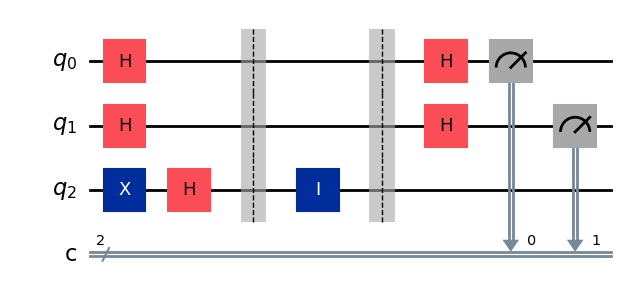

In [5]:
qc_const_0=deutsch_jozsa(num_qubits=2,value=0,oracle=False,oracle_type="constant",b_str="")
qc_const_0.draw("mpl")

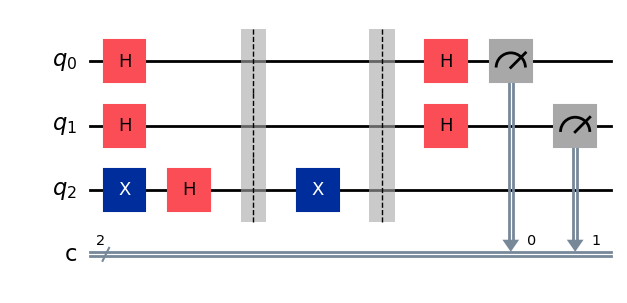

In [6]:
qc_const_1=deutsch_jozsa(num_qubits=2,value=1,oracle=False,oracle_type="constant",b_str="")
qc_const_1.draw("mpl")

## Step 2: Optimize problem for quantum execution

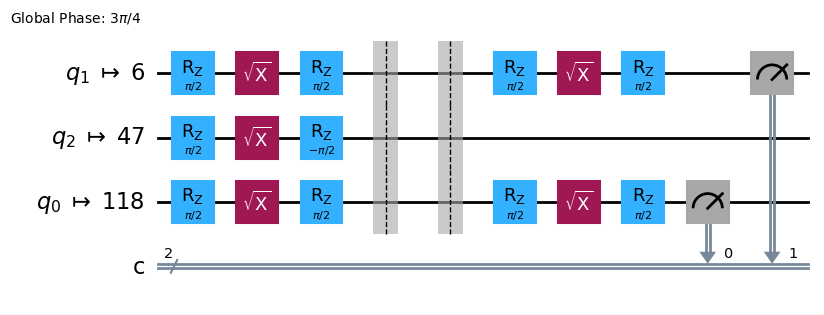

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_const_0=pm.run(qc_const_0)
circuit_isa_const_0.draw(output="mpl",idle_wires=False,style="iqp")

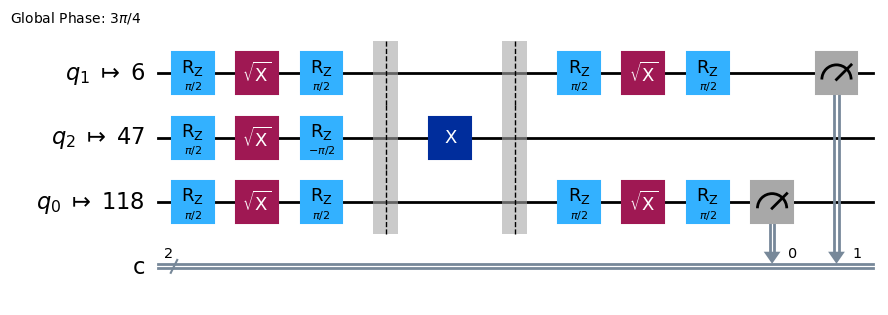

In [8]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_const_1=pm.run(qc_const_1)
circuit_isa_const_1.draw(output="mpl",idle_wires=False,style="iqp")

## Step 3: Execute using Qiskit Primitives

We are now required to run the circuit and sample the measurements on th first qubit thus for execution we will use the Sampler runtime primitive.

In [9]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_const_0 = sampler.run([circuit_isa_const_0]).result()
dist_const_0 = result_const_0[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\4109910389.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [10]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_const_1 = sampler.run([circuit_isa_const_1]).result()
dist_const_1 = result_const_1[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\3360708471.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


## Step 4: Post-Process, reutrn result in Classical format

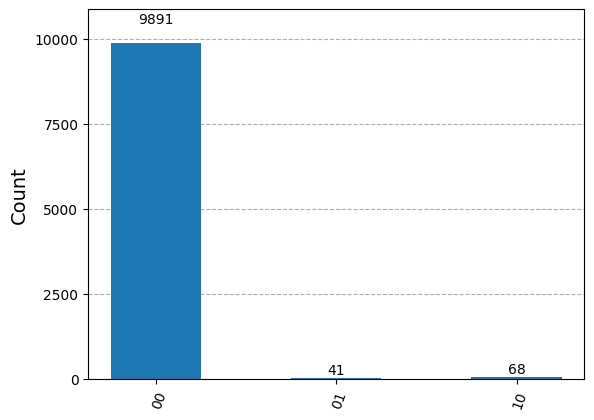

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_const_0)

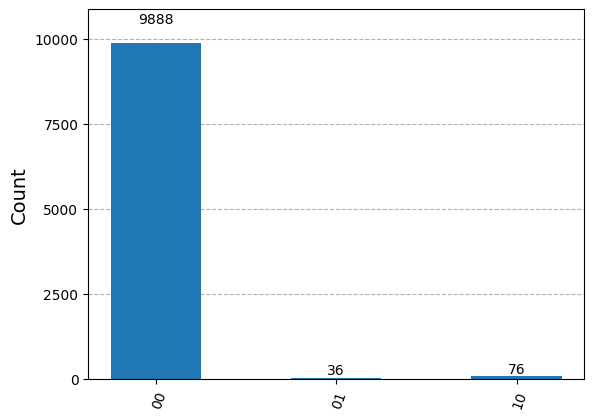

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_const_1)

## Implementing Balanced Oracle

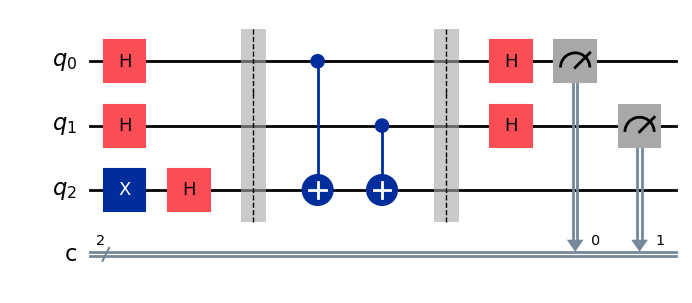

In [13]:
qc_bal_0=deutsch_jozsa(num_qubits=2,value=1,oracle=False,oracle_type="balanced",b_str="00")
qc_bal_0.draw("mpl")

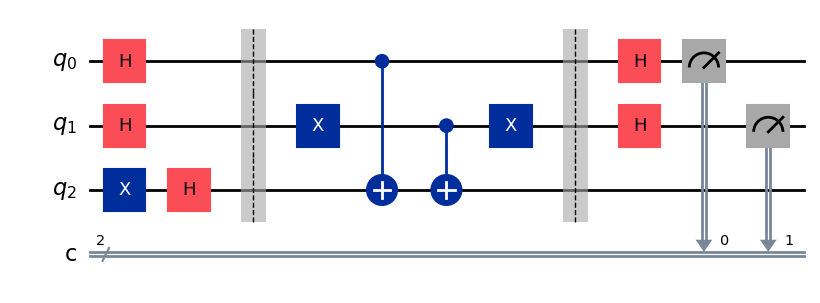

In [14]:
qc_bal_1=deutsch_jozsa(num_qubits=2,value=1,oracle=False,oracle_type="balanced",b_str="01")
qc_bal_1.draw("mpl")

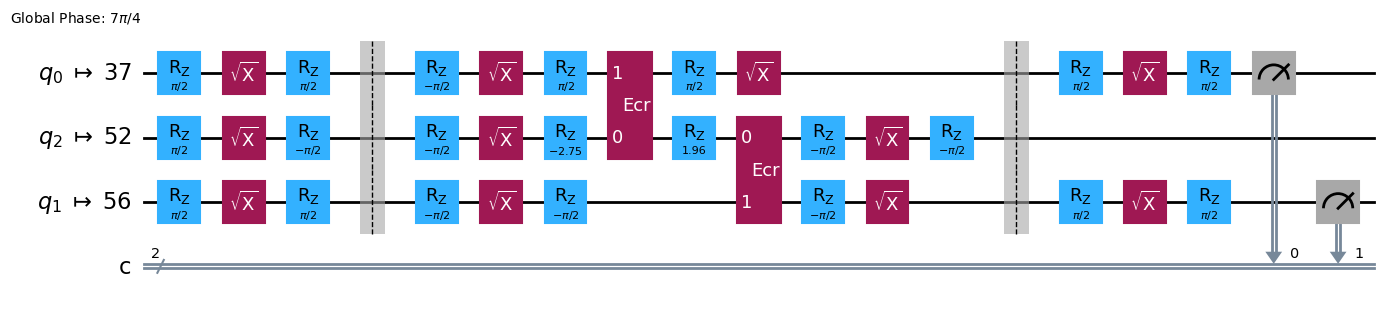

In [15]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_bal_0=pm.run(qc_bal_0)
circuit_isa_bal_0.draw(output="mpl",idle_wires=False,style="iqp")

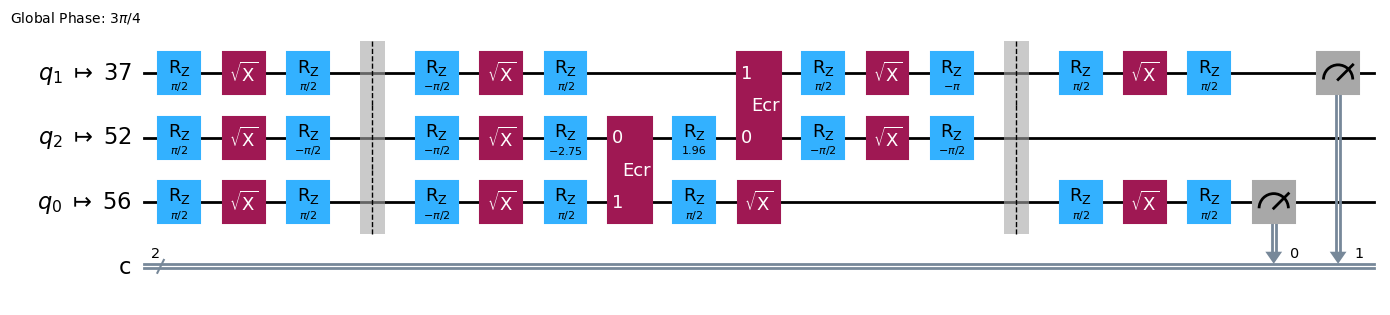

In [16]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_bal_1=pm.run(qc_bal_1)
circuit_isa_bal_1.draw(output="mpl",idle_wires=False,style="iqp")

In [17]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_bal_0 = sampler.run([circuit_isa_bal_0]).result()
dist_bal_0 = result_bal_0[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\1764193510.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


In [18]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_bal_1 = sampler.run([circuit_isa_bal_1]).result()
dist_bal_1 = result_bal_1[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\97205425.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


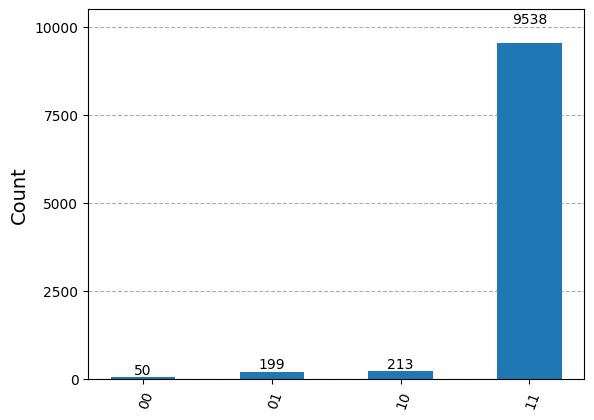

In [19]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_bal_0)

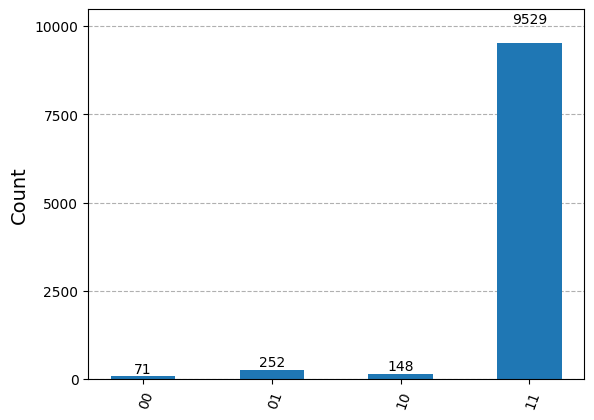

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_bal_1)

## Four qubit example

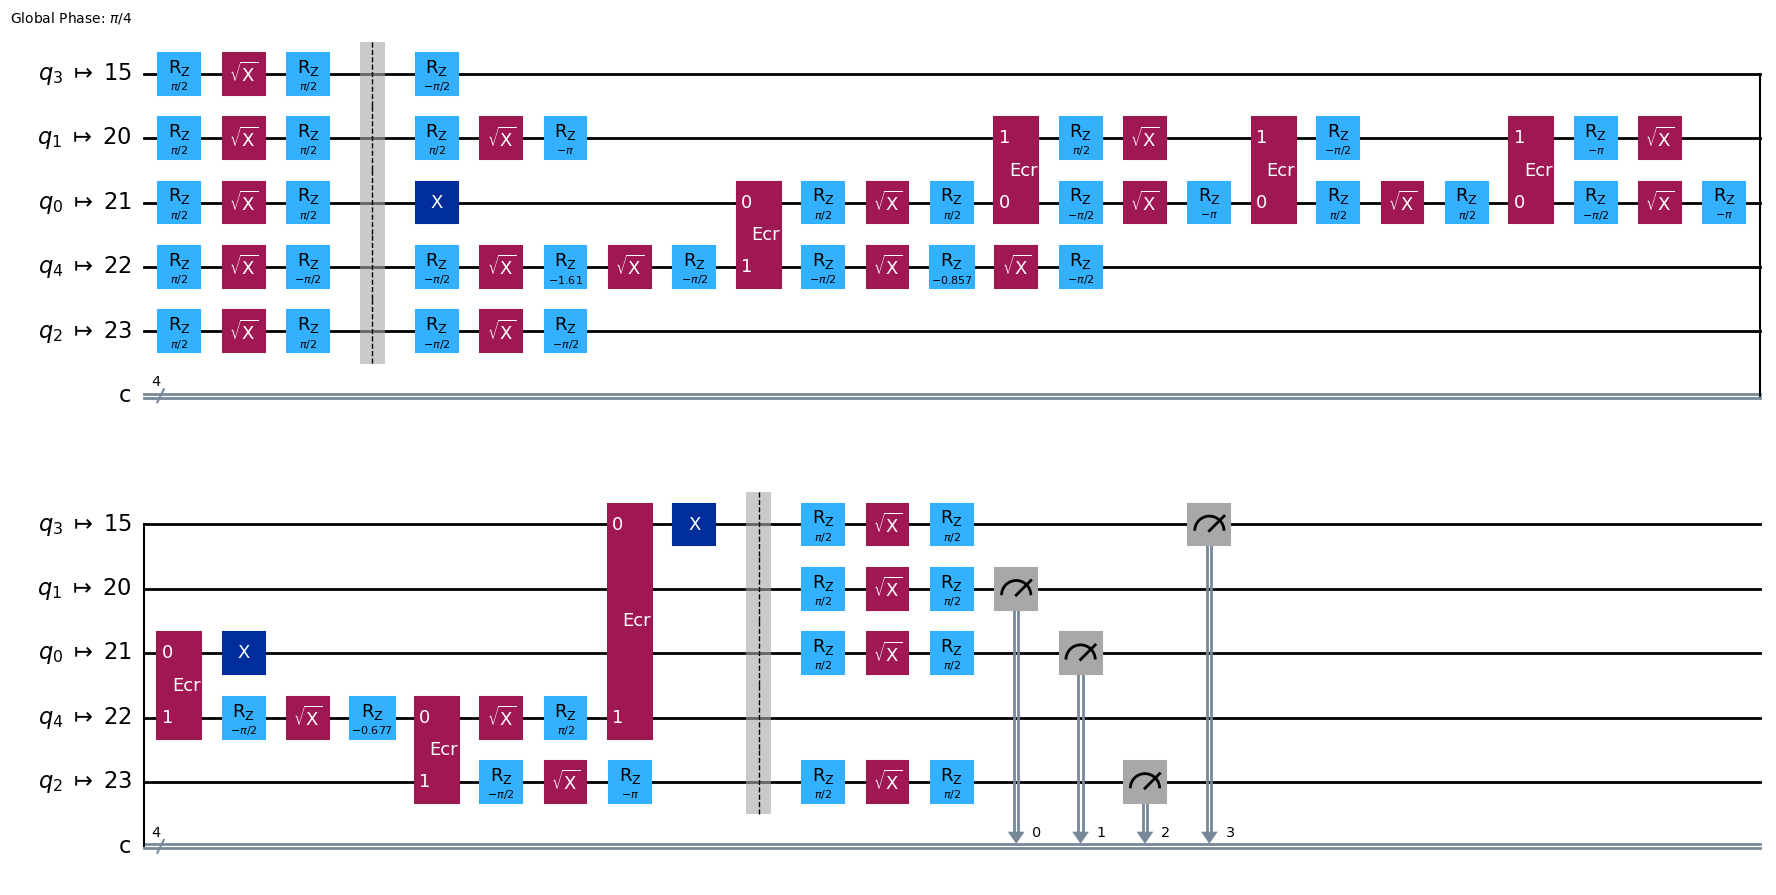

In [33]:
qc_bal_0_4q=deutsch_jozsa(num_qubits=4,value=1,oracle=False,oracle_type="balanced",b_str="0000")
qc_bal_0_4q.draw("mpl")

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_bal_0_4q=pm.run(qc_bal_0_4q)
circuit_isa_bal_0_4q.draw(output="mpl",idle_wires=False,style="iqp")

In [22]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_bal_0_4q = sampler.run([circuit_isa_bal_0_4q]).result()
dist_bal_0_4q = result_bal_0_4q[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\622668557.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


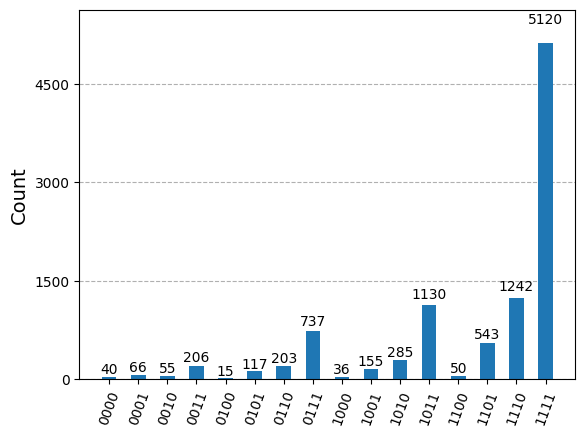

In [23]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_bal_0_4q)

## Similarly between with and without oracle circuit

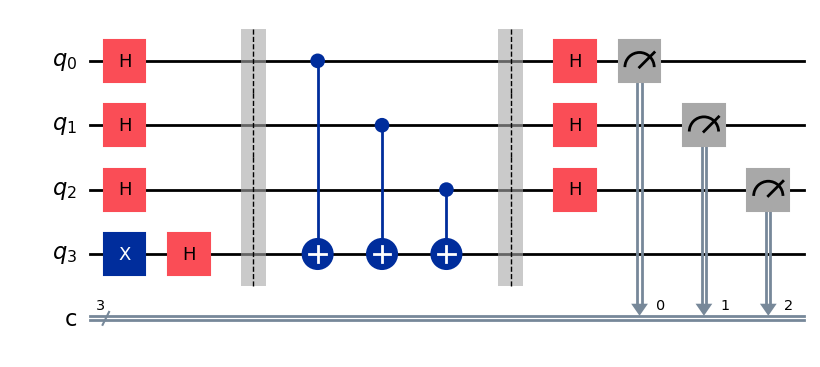

In [25]:
qc_bal_0_3q=deutsch_jozsa(num_qubits=3,value=1,oracle=False,oracle_type="balanced",b_str="000")
qc_bal_0_3q.draw("mpl")

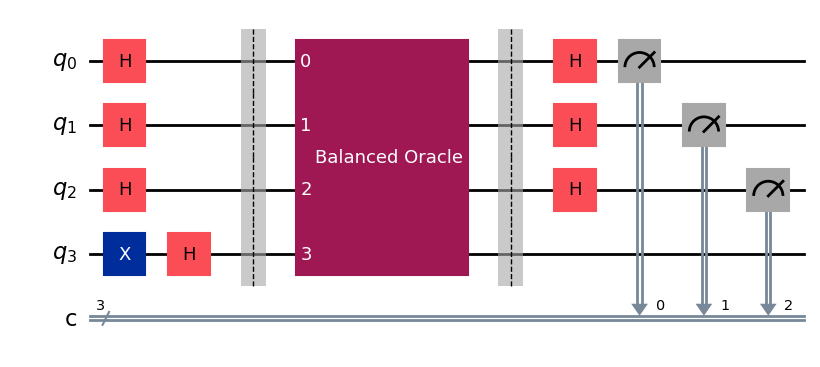

In [27]:
qc_bal_0_3q=deutsch_jozsa(num_qubits=3,value=1,oracle=True,oracle_type="balanced",b_str="000")
qc_bal_0_3q.draw("mpl")

# Trying another example circuit for $f=f_3$ from the lecture notes

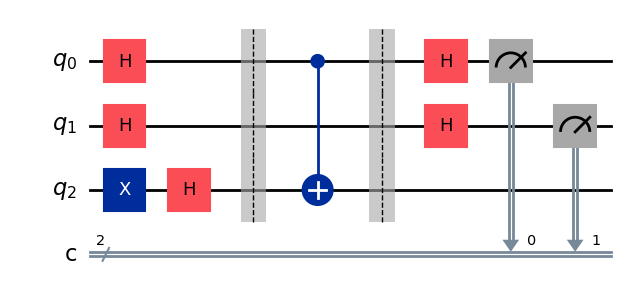

In [28]:
# Create a Quantum Circuit
qubits=QuantumRegister(3,name="q")
cbits=ClassicalRegister(2,name="c")
circuit=QuantumCircuit(qubits,cbits)

q0,q1,q2=qubits
circuit.h(q0)
circuit.h(q1)
circuit.x(q2)
circuit.h(q2)

circuit.barrier()

circuit.cx(q0,q2)

circuit.barrier()

circuit.h(q0)
circuit.h(q1)
circuit.measure(q0,0)
circuit.measure(q1,1)

circuit.draw("mpl")

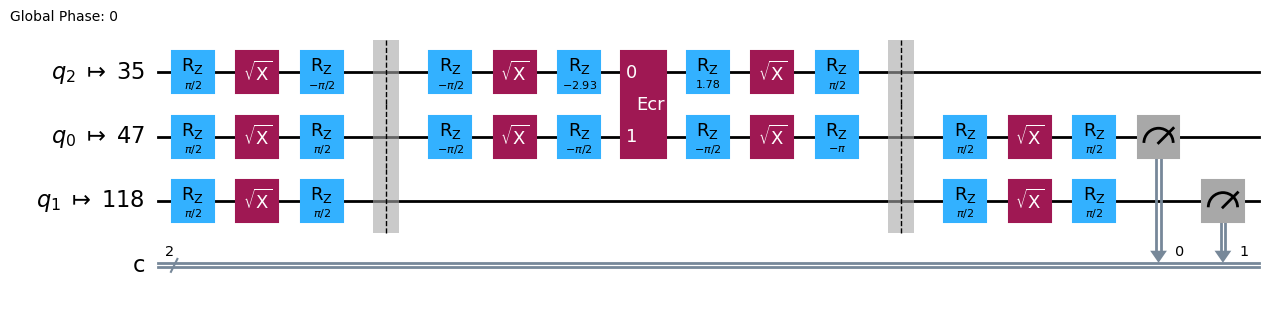

In [29]:
qc_ex=circuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target=backend.target
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

circuit_isa_ex=pm.run(qc_ex)
circuit_isa_ex.draw(output="mpl",idle_wires=False,style="iqp")

In [30]:
# TO run on local simulator:
#1. Use the StatevectorSampler from qiskit.primitves instead
sampler=Sampler(backend=backend)
sampler.options.default_shots=10_000
result_qc_ex = sampler.run([circuit_isa_ex]).result()
dist_qc_ex= result_qc_ex[0].data.c.get_counts()

C:\Users\nihar\AppData\Local\Temp\ipykernel_23000\769199979.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler=Sampler(backend=backend)


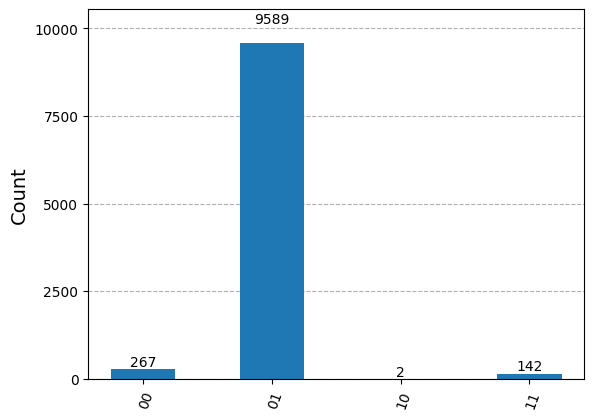

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram(dist_qc_ex)